### Referensi
https://scikit-learn.org/stable/modules/ensemble.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

### Konsep Dasar
Random Forest berkaitan erat dengan Decision Tree. Jika dibuat suatu analogi, suatu hutan (random forest) terbentuk dari pohon-pohon (decision tree). Sehingga Random Forest merupakan hasil dari banyak sekali decision tree. Dengan banyak sekali decision tree yang ada, maka hasil prediksi/clustering menggunakan teknik voting. Yang paling banyak suaranya, dia yang menang. Dengan teknik voting ini, tentunya hasil prediksi akan jauh lebih mendekati hasil yang sebenarnya.

Kata random merujuk pada pemilihan data yang secara random dan pemilihan variabel yang juga random. Pemilihan data secara random maksudnya adalah tiap decision tree yang terbentuk, subset data yang diambil berbeda-beda. Misalkan
1. decision tree ke-1 : row 1-row 150
2. decision tree ke-2 : row 50-row 190
3. decision tree ke-3 : row 40-row 175
.
.
.dst

Sedangkan pemilihan variabel secara random mengacu pada tiap decision tree berasal dari subset yang berbeda. Misal
1. decision tree ke-1 : [X1,X2,X3,X7,Y]
2. decision tree ke-2 : [X2,X3,X5,X6,Y]
3. decision tree ke-3 : [X1,X3,X4,X5,Y]
.
.
. dst

Oleh karena itu, Random Forest dikenal sebagai **Ensemble Method** karena mengkombinasikan beberapa hasil prediksi dari beberapa model dengan tujuan meningkatkan hasil prediksi menjadi jauh lebih baik.

### Import Data

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
diabetes = pd.read_csv('diabetes.csv')

In [5]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Data Preparation

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
## Pemilihan Feature
## Feature selection bisa menggunakan Forward Selection, Backward Selection, PCA
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']

In [9]:
# Feature
X = diabetes[feature_cols]

In [10]:
# Target Variable
y = diabetes.Outcome

In [11]:
from sklearn.model_selection import train_test_split # package untuk split data train dan data test

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Split data into data train and data test
train_test_split?

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train Model

In [15]:
# Create Random Forest Object
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Model Evaluation

In [16]:
y_pred = clf.predict(X_test)

In [17]:
# Import library untuk memperoleh hasil akurasi
from sklearn import metrics

In [18]:
# Akurasi model yaitu membandingkan hasil prediksi dengan hasil sebenarnya
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.7244094488188977


In [19]:
# Hasil Prediksi
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

### Importance Feature
Menemukan feauture yang paling penting. Importance Variable bisa didapatkan di scikit-learn dengan cara
1. Build Model Random Forest
2. Gunakan Feature Importance Variable
3. Visualisasi Feature Importance Variable

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
clf_1 = RandomForestClassifier(n_estimators=100)

In [22]:
clf_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
clf_1.feature_importances_

array([0.08752812, 0.0823846 , 0.17705149, 0.1601957 , 0.28037759,
       0.0840221 , 0.12844039])

In [24]:
X_train.columns

Index(['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure',
       'DiabetesPedigreeFunction'],
      dtype='object')

In [25]:
import pandas as pd

In [26]:
importance_variable = pd.Series(clf_1.feature_importances_, index = X_train.columns ).sort_values(ascending=False)

In [27]:
importance_variable

Glucose                     0.280378
BMI                         0.177051
Age                         0.160196
DiabetesPedigreeFunction    0.128440
Pregnancies                 0.087528
BloodPressure               0.084022
Insulin                     0.082385
dtype: float64

### Visualisasi importance variable

In [28]:
import matplotlib.pyplot as plt

In [29]:
import seaborn as sns

In [30]:
%matplotlib inline

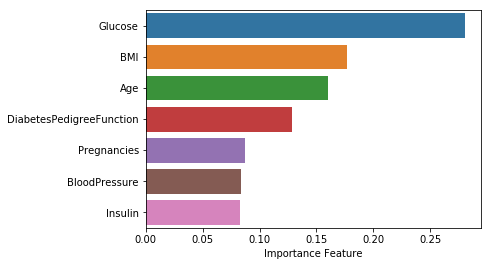

In [31]:
sns.barplot(x=importance_variable,y=importance_variable.index)
plt.xlabel('Importance Feature')
plt.show()